In [64]:
%matplotlib notebook
#if use Jupyter Notebook, run this command before calling matplotlib in notebook.

In [27]:
#pyforest -- no need to explicitly import common libs, but some still need import:
# sklearn/statsmodel/
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train.csv')

In [10]:
test = pd.read_csv('test.csv')

In [3]:
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#.sort_values(by=['Pclass','Sex'], ascending=[True, True])
cls1srvd = train.iloc[:, :3][(train.Survived == 1) & (train.Pclass==1)].join(train.Sex).join(train.Cabin).groupby(train.Sex)

In [5]:
cls1srvd.describe()

PassengerId                                                            \
             count        mean         std   min    25%    50%    75%    max   
Sex                                                                            
female        91.0  473.967033  248.968916   2.0  296.0  458.0  705.0  888.0   
male          45.0  527.777778  215.633410  24.0  431.0  588.0  682.0  890.0   

       Survived       ...           Pclass                                     
          count mean  ...  75%  max  count mean  std  min  25%  50%  75%  max  
Sex                   ...                                                      
female     91.0  1.0  ...  1.0  1.0   91.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
male       45.0  1.0  ...  1.0  1.0   45.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 24 columns]

In [6]:
#.sort_values(by=['Pclass','Sex'], ascending=[True, True])
cls3srvd = train.iloc[:, :3][(train.Survived == 1) & (train.Pclass==3)].join(train.Sex).join(train.Cabin).groupby(train.Sex)

In [7]:
cls3srvd.describe()

PassengerId                                                             \
             count        mean         std   min     25%    50%    75%    max   
Sex                                                                             
female        72.0  359.083333  266.188419   3.0  138.75  322.5  563.5  876.0   
male          47.0  447.638298  255.919776  37.0  241.50  430.0  679.0  870.0   

       Survived       ...           Pclass                                     
          count mean  ...  75%  max  count mean  std  min  25%  50%  75%  max  
Sex                   ...                                                      
female     72.0  1.0  ...  1.0  1.0   72.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  
male       47.0  1.0  ...  1.0  1.0   47.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0  

[2 rows x 24 columns]

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
impute_value = train['Age'].median()

In [13]:
train['Age'] = train['Age'].fillna(impute_value)

In [14]:
test['Age'] = test['Age'].fillna(impute_value)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
train['IsFemale'] = (train['Sex']=='female').astype(int)

In [18]:
test['IsFemale'] = (test['Sex']=='female').astype(int)

In [88]:
predictors = ['Pclass',  'Age', 'IsFemale']

In [89]:
X_train = train[predictors].values

In [90]:
X_test = test[predictors].values

In [91]:
y_train = train['Survived'].values

In [92]:
X_train[:10]

array([[ 3., 22.,  0.],
       [ 1., 38.,  1.],
       [ 3., 26.,  1.],
       [ 1., 35.,  1.],
       [ 3., 35.,  0.],
       [ 3., 28.,  0.],
       [ 1., 54.,  0.],
       [ 3.,  2.,  0.],
       [ 3., 27.,  1.],
       [ 2., 14.,  1.]])

In [93]:
y_train[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [94]:
model = LogisticRegression()

In [95]:
model.fit(X_train, y_train)

C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [96]:
y_predict = model.predict(X_test)

In [97]:
y_predict[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [98]:
#(y_true == y_predict).mean()

In [99]:
X_test_df = pd.DataFrame(X_test,
                        columns=predictors)

In [100]:
X_test_df

,Pclass,Age,IsFemale
0,3.0,34.5,0.0
1,3.0,47.0,1.0
2,2.0,62.0,0.0
3,3.0,27.0,0.0
4,3.0,22.0,1.0
...,...,...,...
413,3.0,28.0,0.0
414,1.0,39.0,1.0
415,3.0,38.5,0.0
416,3.0,28.0,0.0


In [101]:
X_test_df['result']=y_predict

In [102]:
X_test_df

,Pclass,Age,IsFemale,result
0,3.0,34.5,0.0,0
1,3.0,47.0,1.0,0
2,2.0,62.0,0.0,0
3,3.0,27.0,0.0,0
4,3.0,22.0,1.0,1
...,...,...,...,...
413,3.0,28.0,0.0,0
414,1.0,39.0,1.0,1
415,3.0,38.5,0.0,0
416,3.0,28.0,0.0,0


In [104]:
X_test_df.describe()

,Pclass,Age,IsFemale,result
count,418.000000,418.000000,418.000000,418.000000
mean,2.265550,29.805024,0.363636,0.368421
std,0.841838,12.667969,0.481622,0.482954
min,1.000000,0.170000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000
75%,3.000000,35.750000,1.000000,1.000000
max,3.000000,76.000000,1.000000,1.000000


<IPython.core.display.Javascript object>


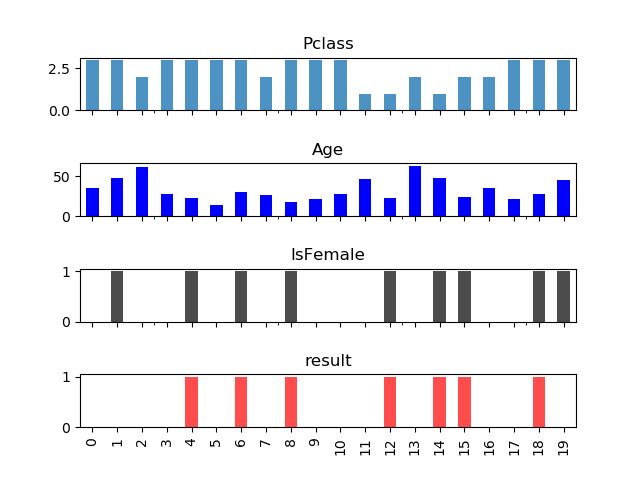

In [200]:
# solution 1
plt.figure()
ax1 = plt.subplot(411)
X_test_df.iloc[:20,0].plot.bar(ax1, 'r--', alpha=0.8, sharex=True, title=X_test_df.columns[0])
ax2 = plt.subplot(412)
X_test_df.iloc[:20,1].plot.bar(ax2, color='b', alpha=1, sharex=True, title=X_test_df.columns[1])
ax3 = plt.subplot(413)
X_test_df.iloc[:20,2].plot.bar(ax3, color='k',alpha=0.7, sharex=True, title=X_test_df.columns[2])
ax4 = plt.subplot(414)
X_test_df.iloc[:20,3].plot.bar(ax4, color='r',alpha=0.7, sharex=True, title=X_test_df.columns[3])
plt.subplots_adjust(wspace=0, hspace=1)

<IPython.core.display.Javascript object>


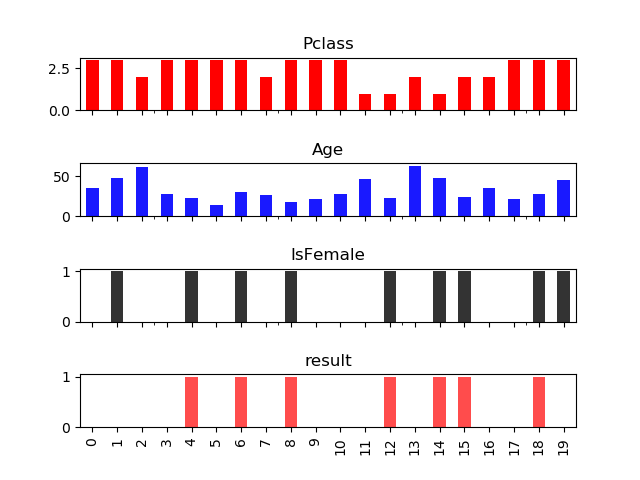

In [220]:
# Solution 2
fig, axes = plt.subplots(4, 1, sharey=False)
colors = ['r', 'b', 'k', 'r']
for i in range(4):
    plt.subplot(4,1, i+1)
    X_test_df.iloc[:20, i].plot.bar(axes[i], color=colors[i], alpha=1-0.1*i, 
                                    title=X_test_df.columns[i], sharex=True)
plt.subplots_adjust(wspace=0, hspace=1)
    
    

In [205]:
from sklearn.linear_model import LogisticRegressionCV

In [206]:
model_cv = LogisticRegressionCV(10)

In [208]:
result_cv = model_cv.fit(X_train, y_train)

C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [211]:
result_cv

LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [213]:
from sklearn.model_selection import cross_val_score

In [214]:
model = LogisticRegression(C=10)

In [215]:
scores = cross_val_score(model, X_train, y_train, cv=4)

C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\stepheny.sisi.yuan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [216]:
scores

array([0.77232143, 0.80269058, 0.77027027, 0.78828829])